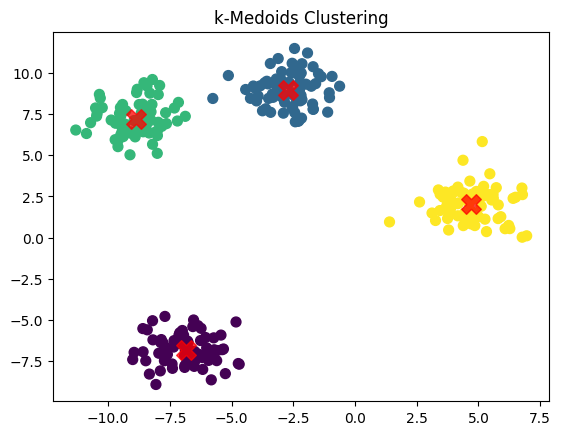

In [ ]:
#without using inbuilt library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import random

def k_medoids(X, k, max_iter=100):
    # Step 1: Initialize medoids randomly
    m = X.shape[0]
    medoids = np.array(random.sample(list(X), k))

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        labels = pairwise_distances_argmin(X, medoids)

        # Step 3: Calculate new medoids
        new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # If medoids didn't change, then we've converged
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Generating synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying k-Medoids algorithm
k = 4
medoids, labels = k_medoids(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering')
plt.show()


In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.8 MB/s eta 0:00:00


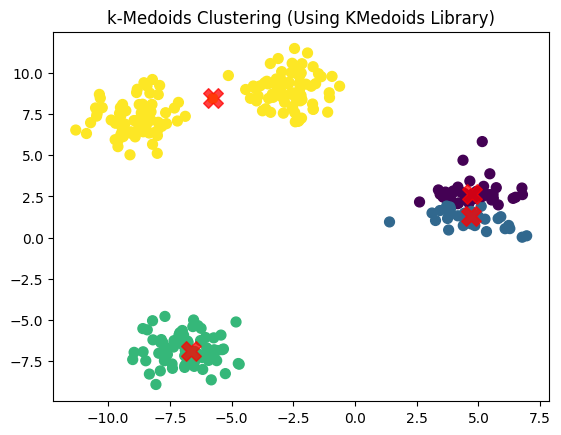

In [ ]:
#using KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply k-Medoids algorithm
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(X)

# Get the medoids and labels
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('k-Medoids Clustering (Using KMedoids Library)')
plt.show()
